## Генерация линейно разделимой выборки



In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
X = pd.read_csv('points.csv')[["x1", "x2"]].values.transpose()
Y = pd.read_csv('points.csv')["y"].values

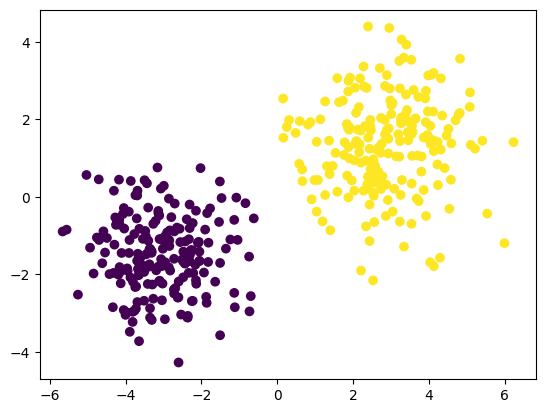

In [58]:
plt.scatter(x=X[0], y=X[1], c=Y)


## Построение нейронной сети

In [68]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def forward(X, w, b):
    return sigmoid(np.dot(w, X) + b)


def l(y, y_hat):
    return -(y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))

def L(y ,y_hat):
    return 1 / len(y) * np.sum(l(y, y_hat))

## Обучение

In [71]:
w = np.zeros(2)
b = 0.0001
lr = 0.1
n_epochs = 200

for epoch in range(n_epochs):
    y_hat = forward(X, w, b)

    dw = (1 / len(Y)) * np.sum((y_hat - Y) * X)
    db = (1 / len(Y)) * np.sum(y_hat - Y)

    w -= lr * dw
    b -= lr * db

    loss = L(Y, y_hat)
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, loss: {loss}')

Epoch 0, loss: -5.000000000006277e-05
Epoch 10, loss: 0.014817845275367706
Epoch 20, loss: 0.012449931823239804
Epoch 30, loss: 0.010959077785569838
Epoch 40, loss: 0.009918852801479595
Epoch 50, loss: 0.009138129110017221
Epoch 60, loss: 0.008522645841241855
Epoch 70, loss: 0.00802017539436211
Epoch 80, loss: 0.00759914625116116
Epoch 90, loss: 0.007239184371384329
Epoch 100, loss: 0.0069264611195998275
Epoch 110, loss: 0.006651206839191197
Epoch 120, loss: 0.0064062911545175365
Epoch 130, loss: 0.0061863677890248905
Epoch 140, loss: 0.005987336168340481
Epoch 150, loss: 0.005805989667363842
Epoch 160, loss: 0.0056397784385979624
Epoch 170, loss: 0.005486645097194094
Epoch 180, loss: 0.005344908160638154
Epoch 190, loss: 0.005213177630893906


## Инференс

In [74]:
X = pd.read_csv('points_test.csv')[["x1", "x2"]].values.transpose()
Y = pd.read_csv('points_test.csv')["y"].values

y_pred = (forward(X, w, b) > 0.5).astype(int)
acc = (y_pred == Y).mean()
print(f'Accuracy: {acc}')

Accuracy: 1.0
